In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [3]:
path_to_data = "../data/3702_left_knee.nii.gz"

In [4]:
vol_data = nib.load(path_to_data)
vol_data

In [5]:
print(vol_data.header)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 216   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int32
bitpix          : 32
slice_start     : 0
pixdim          : [1.       0.869141 0.869141 2.       0.       0.       0.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 222.5
qoffset_y       : 222.5
qoffset_z       : -900.5
s

In [6]:
img_array = vol_data.get_fdata() # get image array data

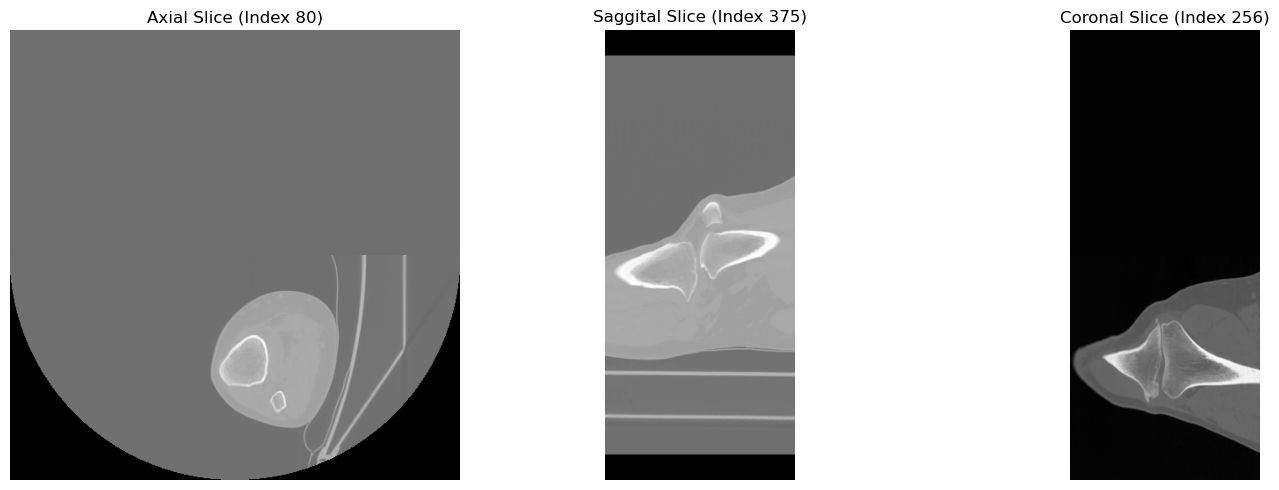

In [7]:
def plot_slices(data):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Axial slice 
    axes[0].imshow(data[:, :, 80], cmap='gray')
    axes[0].set_title('Axial Slice (Index 80)')
    axes[0].axis('off')

    # Coronal slice
    axes[1].imshow(data[375, :, :], cmap='gray')
    axes[1].set_title('Saggital Slice (Index 375)')
    axes[1].axis('off')
    # Sagittal slice
    axes[2].imshow(data[:, 256, :], cmap='gray')
    axes[2].set_title('Coronal Slice (Index 256)')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

plot_slices(img_array)


In [8]:
from monai.bundle import download, ConfigParser
from monai.transforms import LoadImage, LoadImaged, Orientation, Orientationd, EnsureChannelFirst, EnsureChannelFirstd, Compose

c:\Users\DELL\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [9]:
image_loader = LoadImage(image_only=True)
vol = image_loader(path_to_data)

In [10]:
vol.meta

{'sizeof_hdr': array(348),
 'extents': array(0),
 'session_error': array(0, dtype=int16),
 'dim_info': array(0, dtype=uint8),
 'dim': array([  3, 512, 512, 216,   1,   1,   1,   1], dtype=int16),
 'intent_p1': array(0., dtype=float32),
 'intent_p2': array(0., dtype=float32),
 'intent_p3': array(0., dtype=float32),
 'intent_code': array(0, dtype=int16),
 'datatype': array(8, dtype=int16),
 'bitpix': array(32, dtype=int16),
 'slice_start': array(0, dtype=int16),
 'pixdim': array([1.      , 0.869141, 0.869141, 2.      , 0.      , 0.      ,
        0.      , 0.      ], dtype=float32),
 'vox_offset': array(0., dtype=float32),
 'scl_slope': array(nan, dtype=float32),
 'scl_inter': array(nan, dtype=float32),
 'slice_end': array(0, dtype=int16),
 'slice_code': array(0, dtype=uint8),
 'xyzt_units': array(2, dtype=uint8),
 'cal_max': array(0., dtype=float32),
 'cal_min': array(0., dtype=float32),
 'slice_duration': array(0., dtype=float32),
 'toffset': array(0., dtype=float32),
 'glmax': array(0

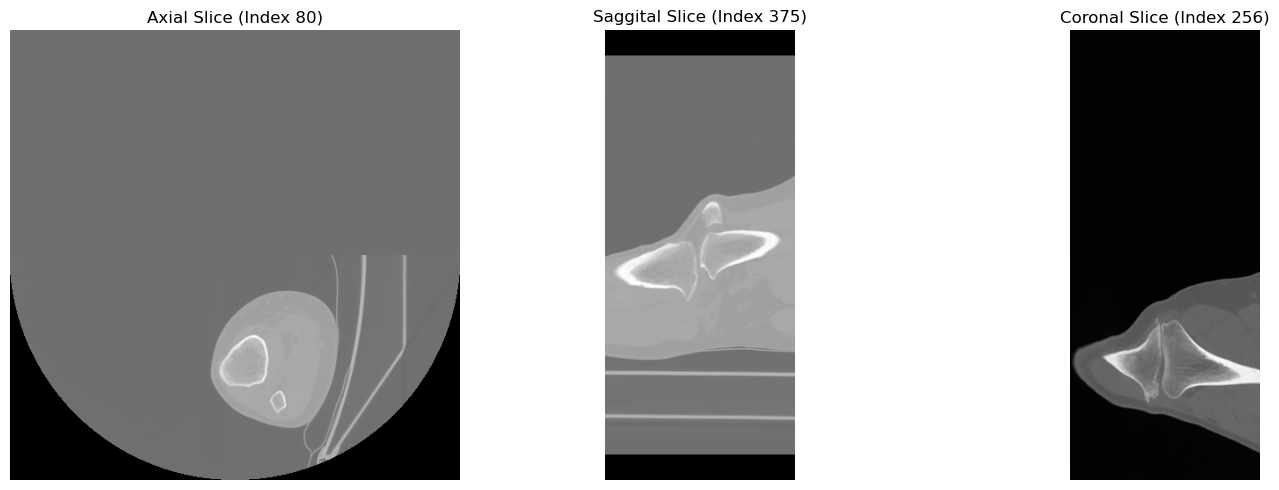

In [11]:
plot_slices(vol)

In [12]:
vol.shape

torch.Size([512, 512, 216])

In [13]:
channel_transform = EnsureChannelFirst() # add channel dimension
vol = channel_transform(vol)
vol.shape

torch.Size([1, 512, 512, 216])

In [14]:
orientation_transform = Orientation(axcodes=('LPS'))
vol = orientation_transform(vol)

In [14]:
vol.shape

torch.Size([1, 512, 512, 216])

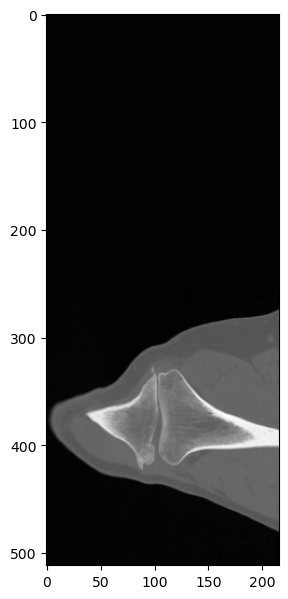

In [15]:
plt.figure(figsize=(3,8))
plt.imshow(vol[0,:,256].cpu().numpy(), cmap="grey")
# plt.pcolormesh(vol[0,:,256].cpu().numpy().T, cmap='Greys_r')
# plt.colorbar(label='HU')
# plt.axis('off')
# plt.show()

In [15]:
preprocessing_pipeline = Compose([
    LoadImage(image_only=True),
    EnsureChannelFirst(),
    Orientation(axcodes='LPS')
])

In [16]:
vol = preprocessing_pipeline(path_to_data)
vol.shape

torch.Size([1, 512, 512, 216])

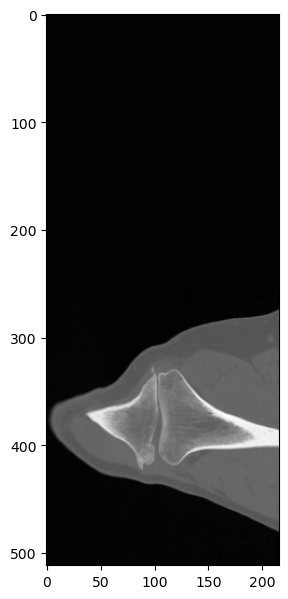

In [17]:
plt.figure(figsize=(3,8))
plt.imshow(vol[0,:,256].cpu().numpy(), cmap="grey")

In [18]:
# model_name = "wholeBody_ct_segmentation"
# download(name=model_name, bundle_dir="../bundle")

2025-06-11 08:24:17,692 - INFO - --- input summary of monai.bundle.scripts.download ---
2025-06-11 08:24:17,694 - INFO - > name: 'wholeBody_ct_segmentation'
2025-06-11 08:24:17,695 - INFO - > bundle_dir: '../bundle'
2025-06-11 08:24:17,696 - INFO - > source: 'monaihosting'
2025-06-11 08:24:17,697 - INFO - > remove_prefix: 'monai_'
2025-06-11 08:24:17,699 - INFO - > progress: True
2025-06-11 08:24:17,700 - INFO - ---


2025-06-11 08:24:18,675 - INFO - Expected md5 is None, skip md5 check for file ..\bundle\wholeBody_ct_segmentation_v0.2.5.zip.
2025-06-11 08:24:18,676 - INFO - File exists: ..\bundle\wholeBody_ct_segmentation_v0.2.5.zip, skipped downloading.
2025-06-11 08:24:18,679 - INFO - Writing into directory: ..\bundle.


In [19]:
# download(name="vista3d", bundle_dir="../bundle")

2025-06-11 08:24:20,152 - INFO - --- input summary of monai.bundle.scripts.download ---
2025-06-11 08:24:20,154 - INFO - > name: 'vista3d'
2025-06-11 08:24:20,155 - INFO - > bundle_dir: '../bundle'
2025-06-11 08:24:20,158 - INFO - > source: 'monaihosting'
2025-06-11 08:24:20,160 - INFO - > remove_prefix: 'monai_'
2025-06-11 08:24:20,161 - INFO - > progress: True
2025-06-11 08:24:20,165 - INFO - ---


2025-06-11 08:24:21,062 - INFO - Expected md5 is None, skip md5 check for file ..\bundle\vista3d_v0.5.7.zip.
2025-06-11 08:24:21,064 - INFO - File exists: ..\bundle\vista3d_v0.5.7.zip, skipped downloading.
2025-06-11 08:24:21,066 - INFO - Writing into directory: ..\bundle.


In [20]:
import os

model_path = "../bundle/wholeBody_ct_segmentation/models/model_lowres.pt"
config_path = "../bundle/wholeBody_ct_segmentation/configs/inference.json"

In [21]:
#create instance of onfig which lets us read from json file

config = ConfigParser()
config.read_config(config_path)

In [22]:
preprocessing = config.get_parsed_content("preprocessing")

In [23]:
data = preprocessing({'image': path_to_data})

In [24]:
#obtain model
model = config.get_parsed_content("network")

In [25]:
import torch
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()

SegResNet(
  (act_mod): ReLU(inplace=True)
  (convInit): Convolution(
    (conv): Conv3d(1, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  )
  (down_layers): ModuleList(
    (0): Sequential(
      (0): Identity()
      (1): ResBlock(
        (norm1): GroupNorm(8, 32, eps=1e-05, affine=True)
        (norm2): GroupNorm(8, 32, eps=1e-05, affine=True)
        (act): ReLU(inplace=True)
        (conv1): Convolution(
          (conv): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        )
        (conv2): Convolution(
          (conv): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        )
      )
    )
    (1): Sequential(
      (0): Convolution(
        (conv): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
      )
      (1): ResBlock(
        (norm1): GroupNorm(8, 64, eps=1e-05, affine=True)
        (norm2): GroupNorm(8, 64, eps=1e-05, a

In [26]:
#inferer --> takes in daa and model as input and returns the model input
inferer = config.get_parsed_content("inferer")

In [27]:
# need post processing after the model has finished running
post_processing = config.get_parsed_content("postprocessing")

In [28]:
with torch.no_grad():
    # new key predictions
    data['pred'] = inferer(data['image'].unsqueeze(0), network=model)

data['pred'] = data['pred'][0]
data['image'] = data['image'][0]

data = post_processing(data)
segmentation = torch.flip(data['pred'][0], dims=[2])
segmentation = segmentation.cpu().numpy()

2025-06-11 08:27:20,644 INFO image_writer.py:197 - writing: C:\Users\DELL\Desktop\RA_Selection_Task_3\results\3702_left_knee\3702_left_knee_trans.nii.gz


In [29]:
segmentation.shape

(512, 512, 216)

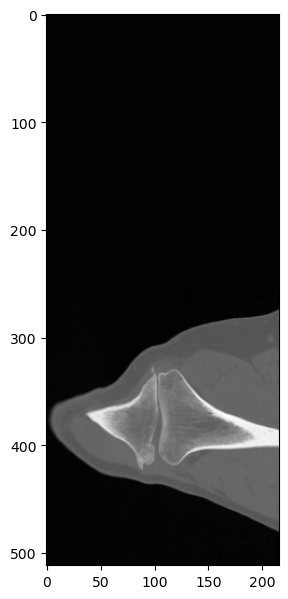

In [30]:
plt.figure(figsize=(3,8))
plt.imshow(vol[0,:,256].cpu().numpy(), cmap="grey")
# plt.pcolormesh(vol[0,:,256].cpu().numpy().T, cmap='Greys_r')
# plt.colorbar(label='HU')
# plt.axis('off')
# plt.show()


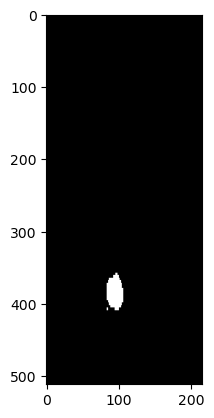

In [31]:
plt.imshow(segmentation[:,256,:], cmap="grey")


In [52]:
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../bundle/vista3d/scripts'))



In [53]:
model_vista3d_path = "../bundle/vista3d/models/model.pt"
config_vista3d_path = "../bundle/vista3d/configs/inference.json"

In [54]:
#create instance of onfig which lets us read from json file

config_vista3d = ConfigParser()
config_vista3d.read_config(config_vista3d_path)

In [55]:
preprocessing_vista3d = config_vista3d.get_parsed_content("preprocessing")

In [56]:
data = preprocessing_vista3d({'image': path_to_data})

In [57]:
#obtain model
model_v3d = config_vista3d.get_parsed_content("network")

In [58]:
model_v3d.load_state_dict(torch.load(model_vista3d_path, map_location=torch.device('cpu')))
model_v3d.eval()

VISTA3D(
  (image_encoder): SegResNetDS2(
    (encoder): SegResEncoder(
      (conv_init): Conv3d(1, 48, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
      (layers): ModuleList(
        (0): ModuleDict(
          (blocks): Sequential(
            (0): SegResBlock(
              (norm1): InstanceNorm3d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
              (act1): ReLU(inplace=True)
              (conv1): Conv3d(48, 48, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
              (norm2): InstanceNorm3d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
              (act2): ReLU(inplace=True)
              (conv2): Conv3d(48, 48, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
            )
          )
          (downsample): Conv3d(48, 96, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
        )
        (1): ModuleDict(
          (blocks): 

In [59]:
#inferer --> takes in daa and model as input and returns the model input
inferer_v3d = config_vista3d.get_parsed_content("inferer")

ModuleNotFoundError: Cannot locate class or function path: 'scripts.inferer.Vista3dInferer'.